<a href="https://colab.research.google.com/github/ishneha1/AI_foundation/blob/main/kmeanscluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

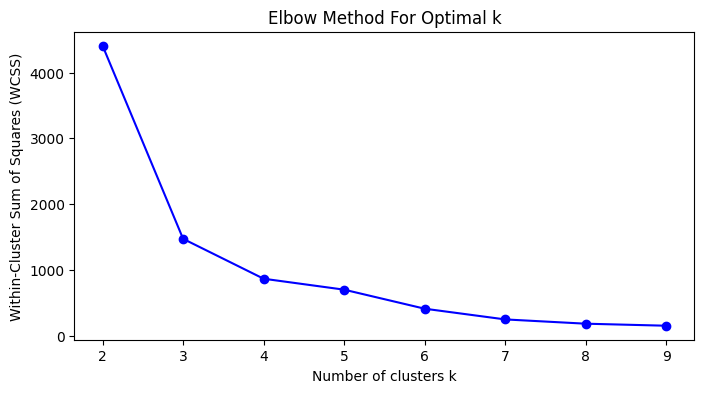

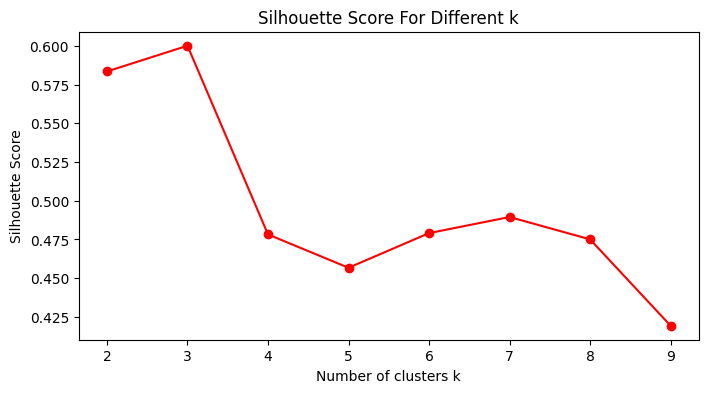

Best number of clusters based on silhouette score: 3


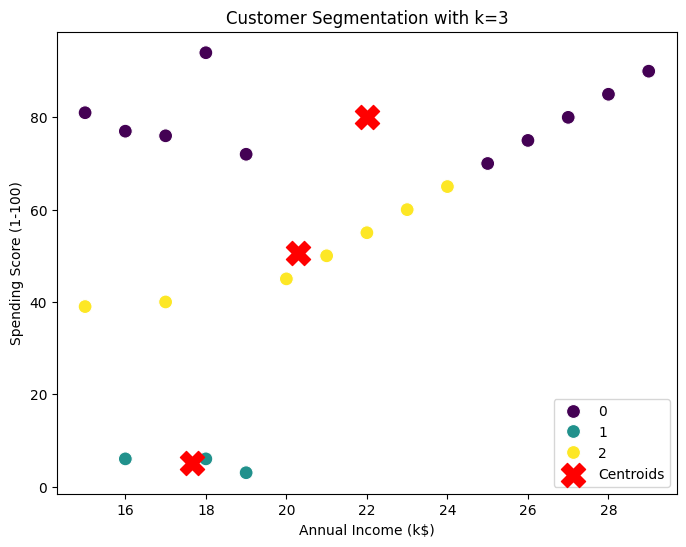

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'CustomerID': range(1, 21),
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30,
            45, 52, 40, 60, 48, 33, 25, 29, 41, 55],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19,
                           20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72,
                              45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
}

df = pd.DataFrame(data)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Elbow Method to find optimal k
wcss = []  # Within-cluster sum of squares
K = range(2, 10)  # Try from 2 to 9 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,4))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score for different k
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8,4))
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different k')
plt.show()

# Choose the best k according to max silhouette score
best_k = K[np.argmax(sil_scores)]
print(f"Best number of clusters based on silhouette score: {best_k}")

# Fit final KMeans with best k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X)

# Plot final clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)

plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')

plt.title(f'Customer Segmentation with k={best_k}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

